In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Loading Tweets: I included the original judgements ("positive" and "negative") given to the Tweets,
#      in order to test them against the judgements of my model that I've built for its accuracy.

from nltk.corpus import twitter_samples

Tweets = ([[t, "positive"] for t in twitter_samples.strings("positive_tweets.json")] + 
             [[t, "negative"] for t in twitter_samples.strings("negative_tweets.json")])

Tweets[0:5]

[['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
  'positive'],
 ['@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
  'positive'],
 ['@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
  'positive'],
 ['@97sides CONGRATS :)', 'positive'],
 ['yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
  'positive']]

In [10]:
# Tokenizing the words for further processing.

from nltk.tokenize import word_tokenize

Tweets_token = Tweets.copy()

for i in range(len(Tweets_token)):
    Tweets_token[i] = word_tokenize(Tweets[i][0])

Tweets_token[0:2]

[['#',
  'FollowFriday',
  '@',
  'France_Inte',
  '@',
  'PKuchly57',
  '@',
  'Milipol_Paris',
  'for',
  'being',
  'top',
  'engaged',
  'members',
  'in',
  'my',
  'community',
  'this',
  'week',
  ':',
  ')'],
 ['@',
  'Lamb2ja',
  'Hey',
  'James',
  '!',
  'How',
  'odd',
  ':',
  '/',
  'Please',
  'call',
  'our',
  'Contact',
  'Centre',
  'on',
  '02392441234',
  'and',
  'we',
  'will',
  'be',
  'able',
  'to',
  'assist',
  'you',
  ':',
  ')',
  'Many',
  'thanks',
  '!']]

In [11]:
# Removing stop words (words that do not contribute meaning) from the Tweets.

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

Tweets_clean = Tweets.copy()

for i in range(len(Tweets_clean)):
    Tweets_clean[i]= [word for word in Tweets_token[i] if word not in stop_words]
    
Tweets_clean[0:3]

[['#',
  'FollowFriday',
  '@',
  'France_Inte',
  '@',
  'PKuchly57',
  '@',
  'Milipol_Paris',
  'top',
  'engaged',
  'members',
  'community',
  'week',
  ':',
  ')'],
 ['@',
  'Lamb2ja',
  'Hey',
  'James',
  '!',
  'How',
  'odd',
  ':',
  '/',
  'Please',
  'call',
  'Contact',
  'Centre',
  '02392441234',
  'able',
  'assist',
  ':',
  ')',
  'Many',
  'thanks',
  '!'],
 ['@',
  'DespiteOfficial',
  'listen',
  'last',
  'night',
  ':',
  ')',
  'As',
  'You',
  'Bleed',
  'amazing',
  'track',
  '.',
  'When',
  'Scotland',
  '?',
  '!']]

In [12]:
from nltk.stem.porter import PorterStemmer

Tweets_stem = Tweets.copy()

porter = PorterStemmer()

for i in range(len(Tweets)):
    Tweets_stem[i]=[porter.stem(word) for word in Tweets_clean[i]]
    
Tweets_stem[:3]

[['#',
  'followfriday',
  '@',
  'france_int',
  '@',
  'pkuchly57',
  '@',
  'milipol_pari',
  'top',
  'engag',
  'member',
  'commun',
  'week',
  ':',
  ')'],
 ['@',
  'lamb2ja',
  'hey',
  'jame',
  '!',
  'how',
  'odd',
  ':',
  '/',
  'pleas',
  'call',
  'contact',
  'centr',
  '02392441234',
  'abl',
  'assist',
  ':',
  ')',
  'mani',
  'thank',
  '!'],
 ['@',
  'despiteoffici',
  'listen',
  'last',
  'night',
  ':',
  ')',
  'As',
  'you',
  'bleed',
  'amaz',
  'track',
  '.',
  'when',
  'scotland',
  '?',
  '!']]

In [13]:
# Making the Tweets into bags of words.

word_list = []

for i1 in range(len(Tweets_stem)):
    for i2 in range(len(Tweets_stem[i1])):
        if Tweets_stem[i1][i2] not in word_list:
            word_list.append([Tweets_stem[i1][i2], Tweets_stem[i1].count(Tweets_stem[i1][i2])])

In [14]:
word_list[0:5]

[['#', 1], ['followfriday', 1], ['@', 3], ['france_int', 1], ['@', 3]]

In [15]:
# Part-of-Speech tagging for the Tweets.

from nltk import pos_tag

Tweets_pos_tagged = Tweets.copy()
for i in range(len(Tweets)):
    Tweets_pos_tagged[i] = pos_tag(Tweets_token[i])

In [16]:
Tweets_pos_tagged[0:2]

[[('#', '#'),
  ('FollowFriday', 'NNP'),
  ('@', 'NNP'),
  ('France_Inte', 'NNP'),
  ('@', 'NNP'),
  ('PKuchly57', 'NNP'),
  ('@', 'NNP'),
  ('Milipol_Paris', 'NNP'),
  ('for', 'IN'),
  ('being', 'VBG'),
  ('top', 'JJ'),
  ('engaged', 'VBN'),
  ('members', 'NNS'),
  ('in', 'IN'),
  ('my', 'PRP$'),
  ('community', 'NN'),
  ('this', 'DT'),
  ('week', 'NN'),
  (':', ':'),
  (')', ')')],
 [('@', 'JJ'),
  ('Lamb2ja', 'NNP'),
  ('Hey', 'NNP'),
  ('James', 'NNP'),
  ('!', '.'),
  ('How', 'WRB'),
  ('odd', 'JJ'),
  (':', ':'),
  ('/', 'JJ'),
  ('Please', 'NNP'),
  ('call', 'VB'),
  ('our', 'PRP$'),
  ('Contact', 'NNP'),
  ('Centre', 'NNP'),
  ('on', 'IN'),
  ('02392441234', 'CD'),
  ('and', 'CC'),
  ('we', 'PRP'),
  ('will', 'MD'),
  ('be', 'VB'),
  ('able', 'JJ'),
  ('to', 'TO'),
  ('assist', 'VB'),
  ('you', 'PRP'),
  (':', ':'),
  (')', ')'),
  ('Many', 'JJ'),
  ('thanks', 'NNS'),
  ('!', '.')]]

I've gathered lists of positive and negative words from University of Illinois at Chicago (https://ptrckprry.com/course/ssd/data/negative-words.txt)

I will go on to check the Tweets against these lists, and score them.

pd.options.mode.chained_assignment = None

In [17]:
positive_words = []
with open ("/Users/muduo/Documents/PosWordsList.txt") as f:
    for line in f:
        positive_words.append(line.strip())

positive_words[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [18]:
negative_words = []
with open ("/Users/muduo/Documents/NegWordsList.txt") as f:
    for line in f:
        negative_words.append(line.strip())

negative_words[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [19]:
# Taking the stems of all positive and negative words

pos_stem = positive_words.copy()
neg_stem = negative_words.copy()

for i in range(len(pos_stem)):
    pos_stem[i]=porter.stem(pos_stem[i])

for i in range(len(neg_stem)):
    neg_stem[i]=porter.stem(neg_stem[i])

print(pos_stem[0:5],
neg_stem[0:5])

['a+', 'abound', 'abound', 'abund', 'abund'] ['2-face', '2-face', 'abnorm', 'abolish', 'abomin']


In [20]:
# Removing duplicates

uniques = []

for i in pos_stem:
    if i not in uniques:
        uniques.append(i)
        pos_stem = uniques

uniques = []
   
for i in neg_stem:
    if i not in uniques:
        uniques.append(i)
        neg_stem = uniques
        
print(pos_stem[0:5],
neg_stem[0:5])

['a+', 'abound', 'abund', 'access', 'acclaim'] ['2-face', 'abnorm', 'abolish', 'abomin', 'abort']


In [21]:
Tweets_df = pd.DataFrame(Tweets)

In [26]:
Tweets_df["Score"] = 0

# Turning off PANDAS SettingWithCopyWarning.
pd.options.mode.chained_assignment = None

for row in range(len(Tweets)):
    for word in Tweets_stem[row]:
        if word in pos_stem:
            Tweets_df.Score[row] += 1
            
for row in range(len(Tweets)):
     for word in Tweets_stem[row]:
        if word in neg_stem:
             Tweets_df.Score[row] -= 1
            
print (Tweets_df[0:5])
print (Tweets_df[-6:-1])

                                                   0         1  Score
0  #FollowFriday @France_Inte @PKuchly57 @Milipol...  positive      2
1  @Lamb2ja Hey James! How odd :/ Please call our...  positive      1
2  @DespiteOfficial we had a listen last night :)...  positive      0
3                               @97sides CONGRATS :)  positive      0
4  yeaaaah yippppy!!!  my accnt verified rqst has...  positive      2
                                                      0         1  Score
9994                ill be on soon, I PROMISE :(\nwaaah  negative      0
9995               I wanna change my avi but uSanele :(  negative      0
9996                         MY PUPPY BROKE HER FOOT :(  negative     -1
9997           where's all the jaebum baby pictures :((  negative      0
9998  But but Mr Ahmad Maslan cooks too :( https://t...  negative      0


Testing the accuracy of this method, and its effectiveness in guessing whether the Tweets are positive or negative.

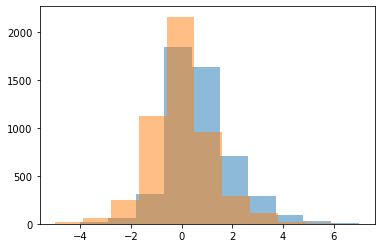

In [38]:
#Showing both histograms.
plt.hist(Tweets_df.Score[Tweets_df[1]=="positive"], alpha = 0.5)
plt.hist(Tweets_df.Score[Tweets_df[1]=="negative"], alpha = 0.5)
plt.show()

In [43]:
# Showing descriptive statistics for the data

print("Postive Scores: {}".format(Tweets_df.Score[Tweets_df[1]=="positive"].describe()))
print("\nNegative Scores: {}".format(Tweets_df.Score[Tweets_df[1]=="negative"].describe()))

Postive Scores: count    5000.00000
mean        0.80660
std         1.19293
min        -4.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         7.00000
Name: Score, dtype: float64

Negative Scores: count    5000.000000
mean        0.028200
std         1.141782
min        -5.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: Score, dtype: float64


The mode for both Tweets' scores are 0, not very significant here. There are more negative Tweets with a score of 0 than there are positive Tweets.
The mean of scores for positive Tweets are higher than that for negative Tweets by around 0.73. Meaning that positive Tweets contain around 0.73 positive words and/or 0.73 less negative words than negative Tweets.
**********************************************************************************************************************
Finally, I will test the accuracy of the method through predicting the category of the data by its score.

If the score is below 0, the model will predict that the Tweet to be negative. If the score is above 0, the model will predict the Tweet to be positive.

In [53]:
correct_pos_predicts = 0

correct_neg_predicts = 0

for i in range(len(Tweets_df)):
    if Tweets_df.Score[i] > 0:
        if Tweets_df[1][i] == "positive":
            correct_pos_predicts += 1
    if Tweets_df.Score[i] < 0:
        if Tweets_df[1][i] == "negative":
            correct_neg_predicts += 1 
        
print (correct_pos_predicts)
print (correct_neg_predicts)

2771
1448


Out of 10,000 Tweets, this method predicts the sentiment of Tweet 2771+1448 = 4219 times.

Bibliography:

     Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."<br>
          Proceedings of the ACM SIGKDD International Conference on Knowledge<br>
          Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,<br>
          Washington, USA